In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from utils.queue.regular_process import service_times, interarrival_times, INITIAL_VALUE
from utils.queue.anomalies import shock_service_time, reduced_interarrival_times, increasing_service_times, deterministic_geometric_arrivals
from utils.simulate_markov import simulate_lindley_process, simulate_lindley_process_with_dynamic_anomaly

# Section 4 - Queuing model - Plotting anomalies

This notebook contains the code used used to generate the plots of the queuing related anomalies in Section 4 of the main text and in S5 of the supplementary material.

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Number of steps on each trajectory
n_steps = 200
# Number of normal trajectories to simulate
M = 100
# Number of anomalous trajectories to simulate
A = 100

# Size of the shock
ANOMALY_SHOCK_SIZE = 0.1
# Size of the anomalous part (percent of the total length)
ABNORMAL_PART_LENGTH_PERCENT = 0.2

In [5]:
# Simulate regular  queue processes of the same length
random_seed +=1
regular_queue_trajectories = simulate_lindley_process(
    n_steps=n_steps, 
    interarrival_times=interarrival_times,
    service_times=service_times, 
    initial_value=INITIAL_VALUE, 
    num_processes=M, 
    seed=random_seed
)

## Model 1 (Shock anomaly)

In [6]:
random_seed +=1
anomalous_shock_queue_trajectories = simulate_lindley_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    interarrival_times=interarrival_times,
    service_times=service_times, 
    anomalous_interarrival_times=interarrival_times,
    anomalous_service_times=shock_service_time,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=ANOMALY_SHOCK_SIZE,
    seed=random_seed,
    restart_after_anomaly=True,
)

We plot the regular trajectories and the anomalous trajectories in the same plot.

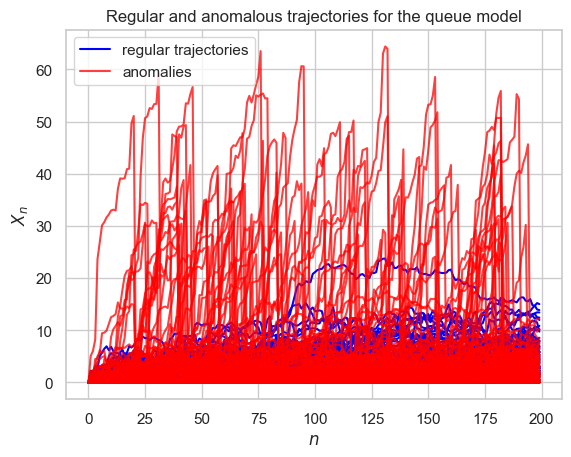

In [7]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_shock_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=0.75)
    else:
        plt.plot(trajectory, color="red", alpha=0.75)
plt.title("Regular and anomalous trajectories for the queue model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

We select one anomalous trajectory to plot it alongside the regular trajectories.

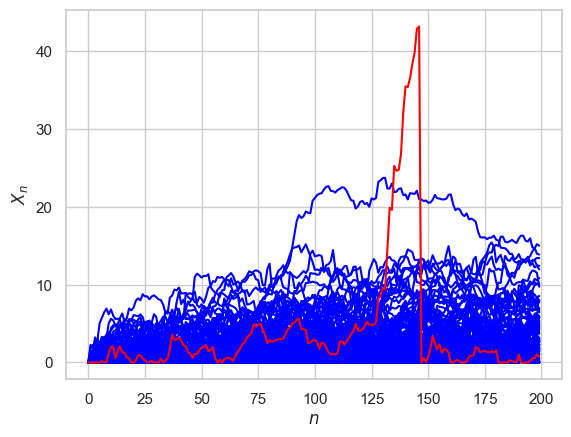

In [8]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_shock_queue_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 2 (Reduced interarrival times)

In [9]:
# Simulate anomalous process
random_seed +=1
anomalous_reduced_interarrival_queue_trajectories = simulate_lindley_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    interarrival_times=interarrival_times,
    service_times=service_times, 
    anomalous_interarrival_times=reduced_interarrival_times,
    anomalous_service_times=service_times,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=ABNORMAL_PART_LENGTH_PERCENT,
    restart_after_anomaly=True,
    seed=random_seed,
)

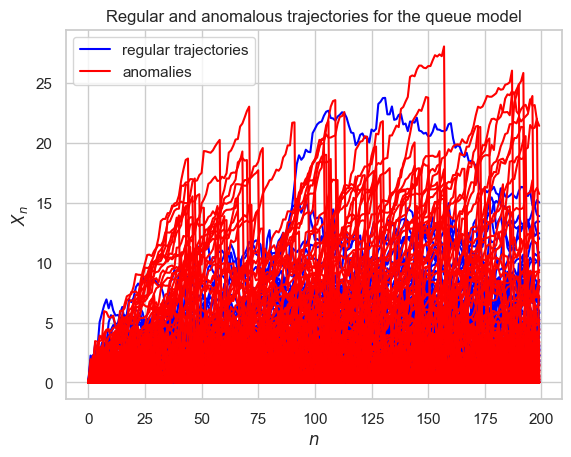

In [10]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_reduced_interarrival_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the queue model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

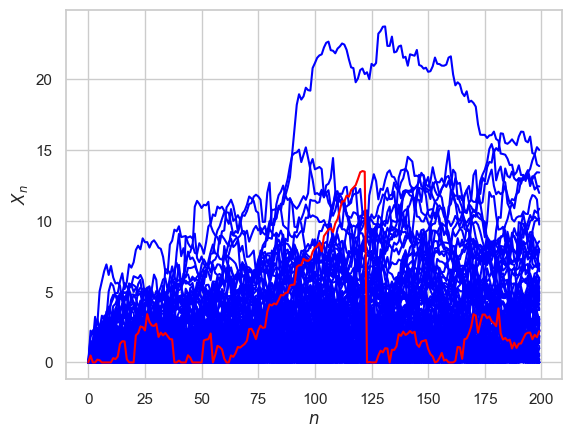

In [11]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_reduced_interarrival_queue_trajectories[1], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 3 (slight increase in service times)

In [12]:
# Simulate anomalous process
random_seed +=1
anomalous_increasing_service_times_queue_trajectories = simulate_lindley_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    interarrival_times=interarrival_times,
    service_times=service_times, 
    anomalous_interarrival_times=interarrival_times,
    anomalous_service_times=increasing_service_times,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=0.3,
    seed=random_seed,
    restart_after_anomaly=True,
)

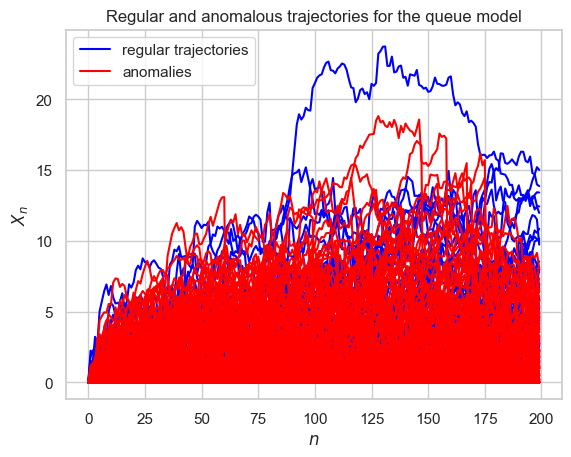

In [13]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_increasing_service_times_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the queue model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

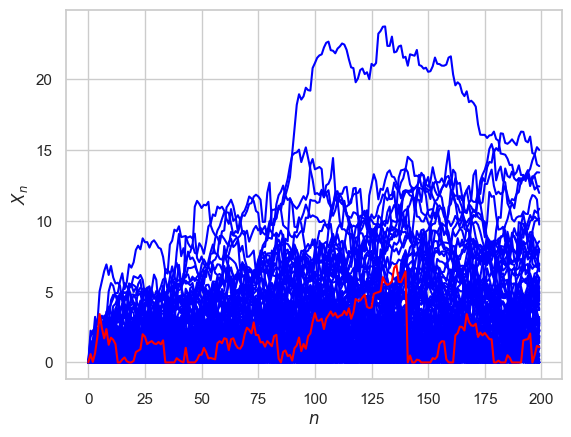

In [14]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_increasing_service_times_queue_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

## Model 4 (Deterministic geometric arrivals)

In [15]:
# Simulate anomalous process
random_seed +=1
anomalous_deterministic_geometric_arrivals_queue_trajectories = simulate_lindley_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    interarrival_times=interarrival_times,
    service_times=service_times, 
    anomalous_interarrival_times=deterministic_geometric_arrivals,
    anomalous_service_times=service_times,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=25,
    seed=random_seed,
)

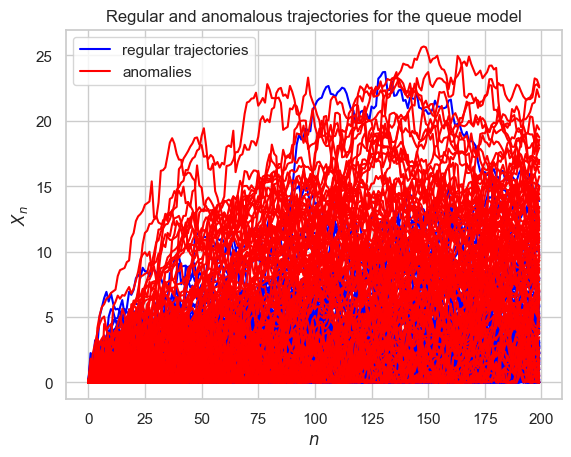

In [16]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="blue", label="regular trajectories")
    else:
        plt.plot(trajectory, color="blue")

for i, trajectory in enumerate(anomalous_deterministic_geometric_arrivals_queue_trajectories):
    if i == 0:
        plt.plot(trajectory, color="red", label="anomalies", alpha=1)
    else:
        plt.plot(trajectory, color="red", alpha=1)
plt.title("Regular and anomalous trajectories for the queue model")
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()

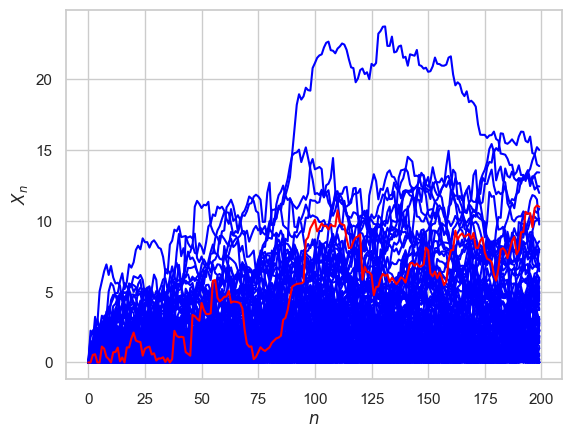

In [17]:
# Plot regular trajectories
for i, trajectory in enumerate(regular_queue_trajectories):
    plt.plot(trajectory, color="blue")

plt.plot(anomalous_deterministic_geometric_arrivals_queue_trajectories[0], color="red", alpha=1)

plt.xlabel(r"$n$")
plt.ylabel(r"$X_n$")
plt.show()